# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.shape

(50000, 14)

In [10]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [11]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

There are no missing values

## EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

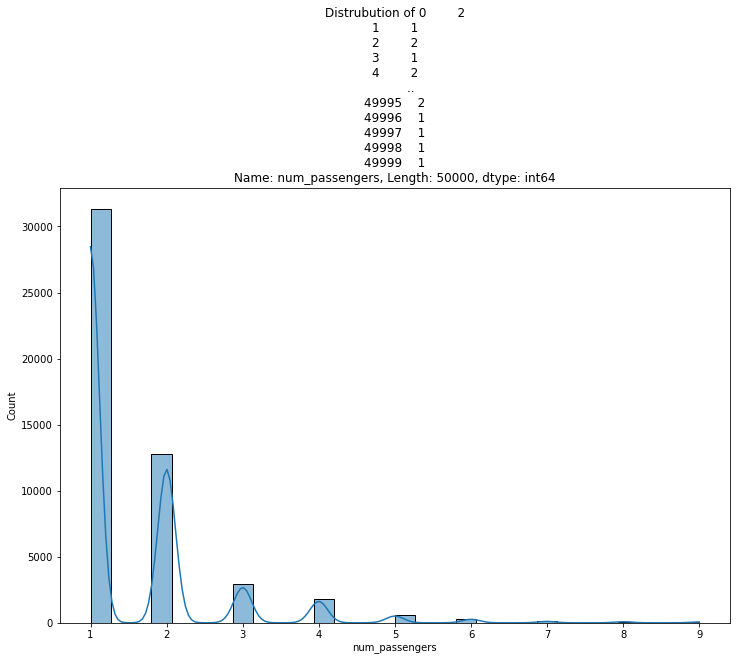

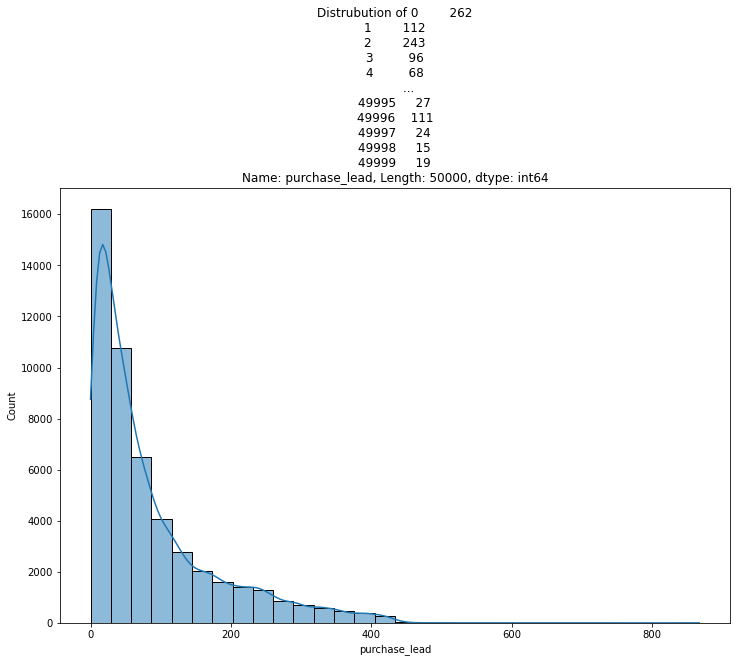

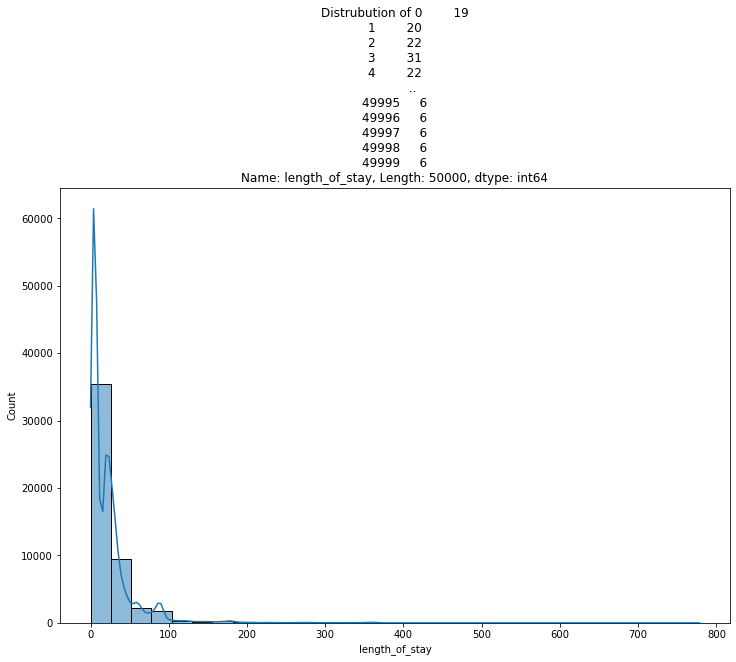

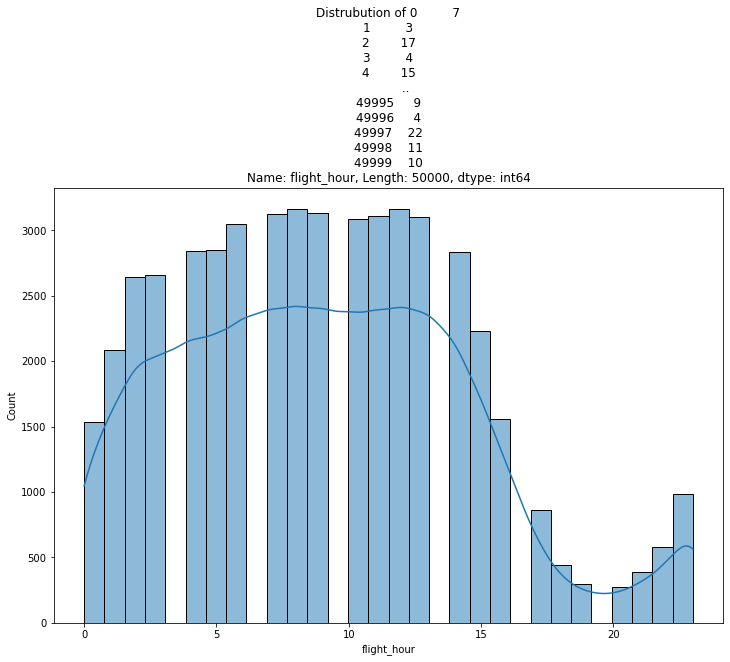

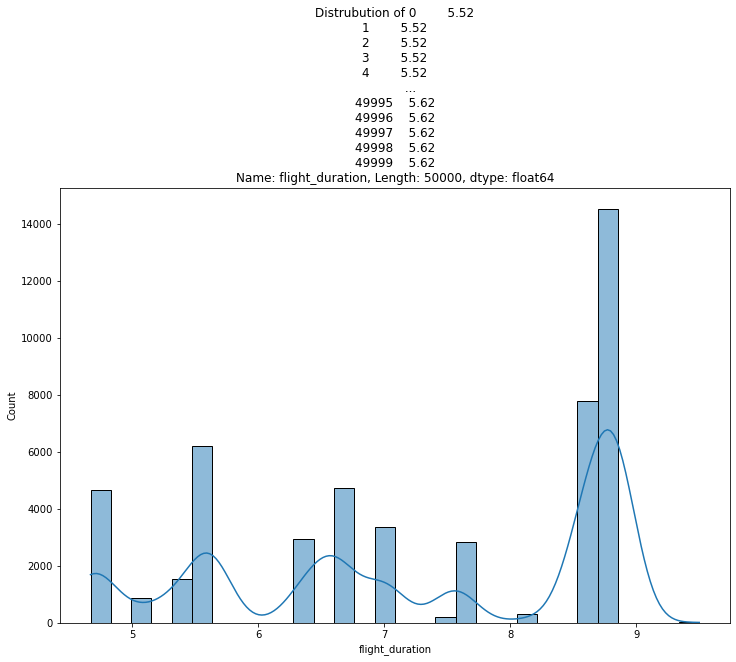

In [13]:
num_cols = [df["num_passengers"],df["purchase_lead"],df["length_of_stay"],df["flight_hour"],df["flight_duration"]]

for i in num_cols:
    plt.figure(figsize=(12,8))
    sns.histplot(i,kde=True,bins=30)
    plt.title(f"Distrubution of {i}")
    plt.show()


In [14]:
# cat_cols = [df["sales_channel"],df["trip_type"],df["flight_day"]]

# for i in cat_cols:
#     plt.figure(figsize=(12,8))
#     sns.countplot(y=i,order=i.value_counts().index)
#     plt.title(f"Frequency of {i}")
#     plt.show()

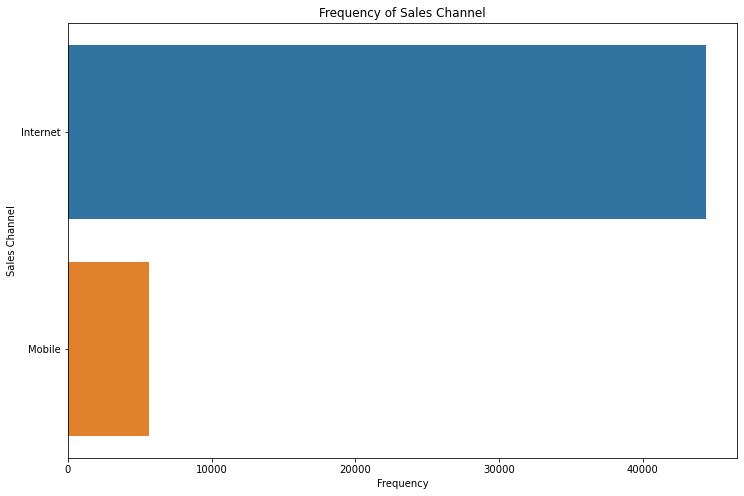

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(y=df["sales_channel"],order=df["sales_channel"].value_counts().index)
plt.title("Frequency of Sales Channel")
plt.xlabel("Frequency")
plt.ylabel("Sales Channel")
plt.show()

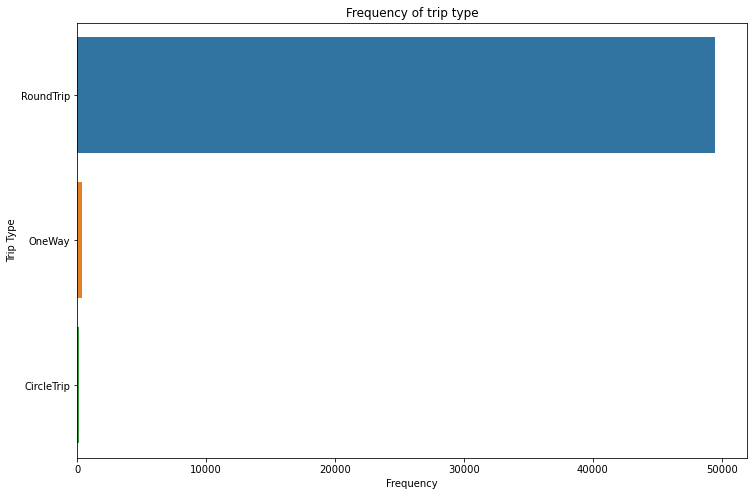

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(y=df["trip_type"],order=df["trip_type"].value_counts().index)
plt.title("Frequency of trip type")
plt.xlabel("Frequency")
plt.ylabel("Trip Type")
plt.show()

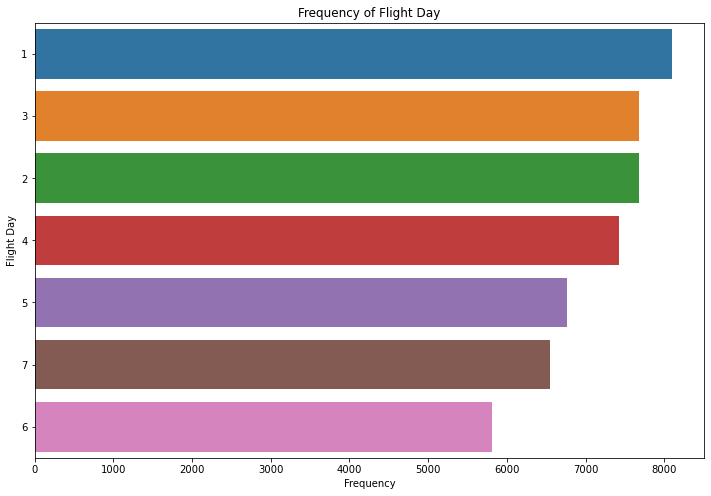

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(y=df["flight_day"],order=df["flight_day"].value_counts().index)
plt.title("Frequency of Flight Day")
plt.xlabel("Frequency")
plt.ylabel("Flight Day")
plt.show()

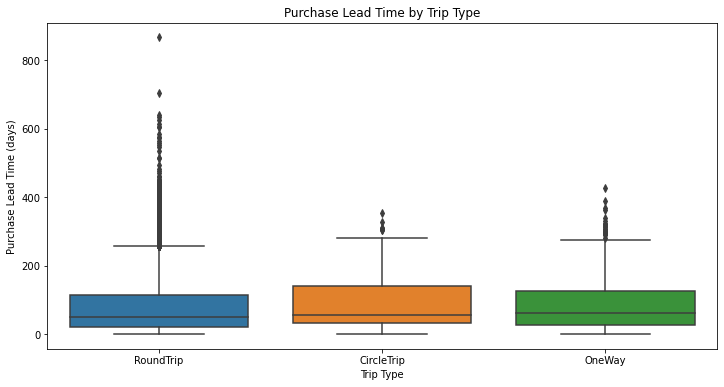

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='trip_type', y='purchase_lead', data=df)
plt.title('Purchase Lead Time by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Purchase Lead Time (days)')
plt.show()



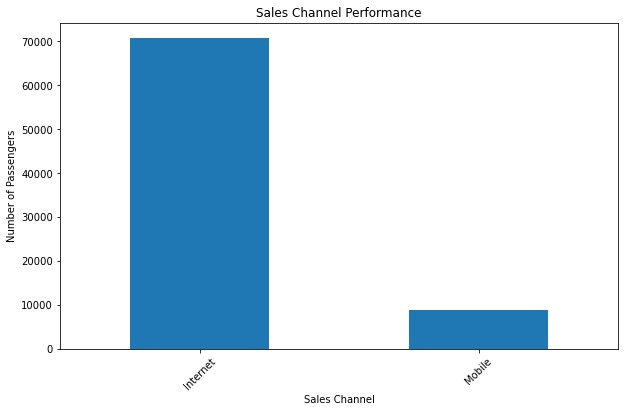

In [19]:
channel_performance = df.groupby('sales_channel')['num_passengers'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
channel_performance.plot(kind='bar')
plt.title('Sales Channel Performance')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()


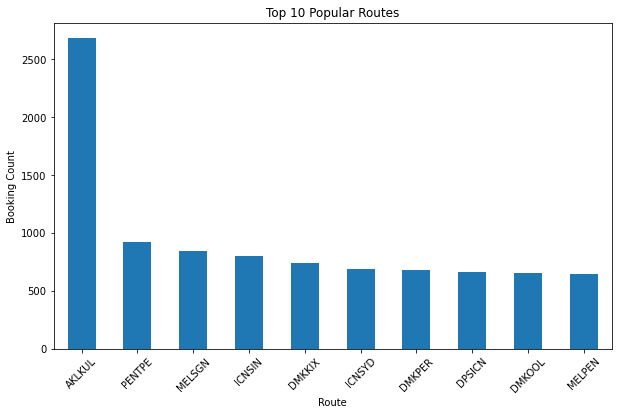

In [20]:
top_routes = df['route'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_routes.plot(kind='bar')
plt.title('Top 10 Popular Routes')
plt.xlabel('Route')
plt.ylabel('Booking Count')
plt.xticks(rotation=45)
plt.show()


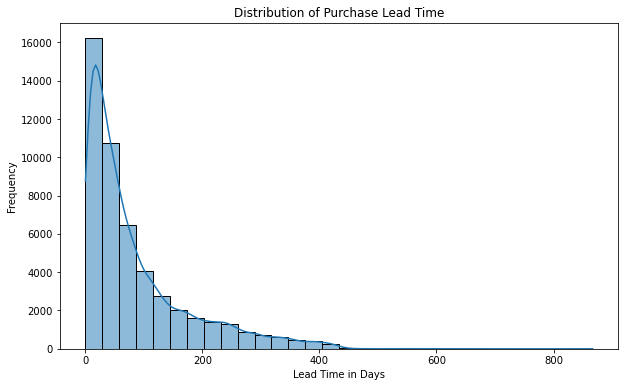

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_lead'], bins=30, kde=True)
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Lead Time in Days')
plt.ylabel('Frequency')
plt.show()

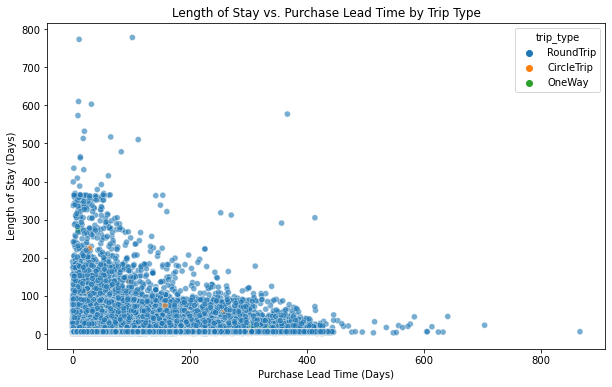

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_lead', y='length_of_stay', data=df, hue='trip_type', alpha=0.6)
plt.title('Length of Stay vs. Purchase Lead Time by Trip Type')
plt.xlabel('Purchase Lead Time (Days)')
plt.ylabel('Length of Stay (Days)')
plt.show()

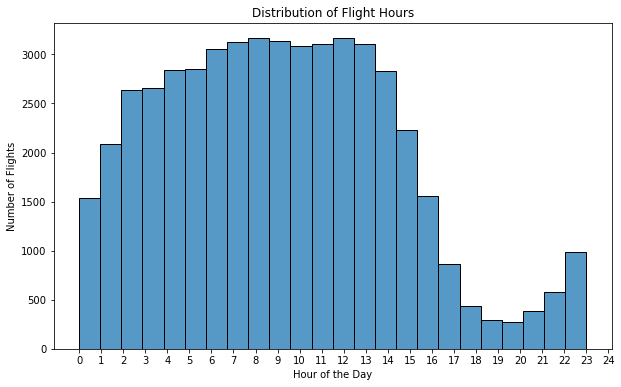

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['flight_hour'], bins=24, kde=False)
plt.title('Distribution of Flight Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 25, 1))
plt.show()

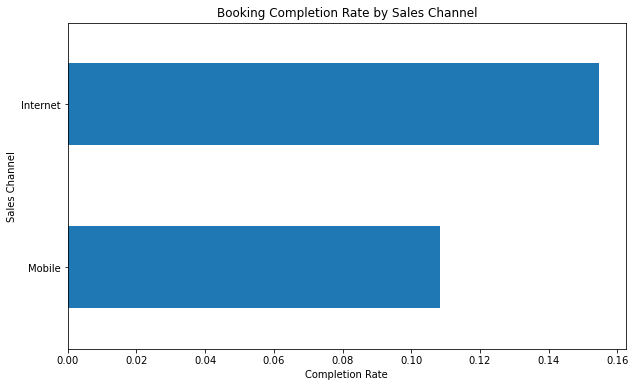

In [24]:
completion_rate_by_channel = df.groupby('sales_channel')['booking_complete'].mean()

plt.figure(figsize=(10, 6))
completion_rate_by_channel.sort_values().plot(kind='barh')
plt.title('Booking Completion Rate by Sales Channel')
plt.xlabel('Completion Rate')
plt.ylabel('Sales Channel')
plt.show()

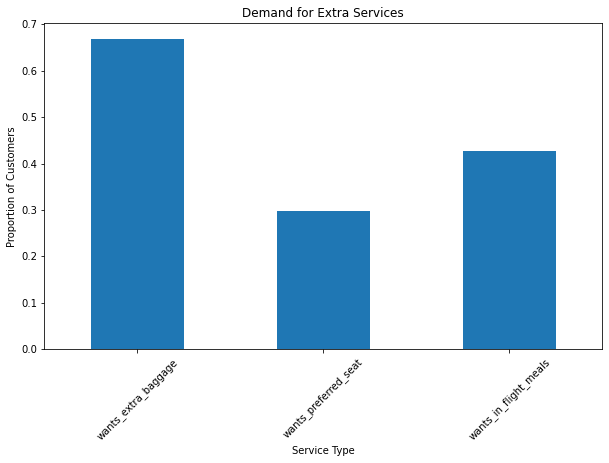

In [25]:
extra_services = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].mean()

plt.figure(figsize=(10, 6))
extra_services.plot(kind='bar')
plt.title('Demand for Extra Services')
plt.xlabel('Service Type')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=45)
plt.show()

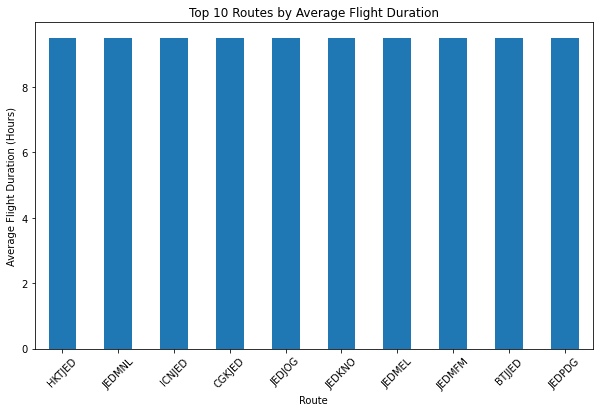

In [26]:
avg_duration_by_route = df.groupby('route')['flight_duration'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_duration_by_route.plot(kind='bar')
plt.title('Top 10 Routes by Average Flight Duration')
plt.xlabel('Route')
plt.ylabel('Average Flight Duration (Hours)')
plt.xticks(rotation=45)
plt.show()

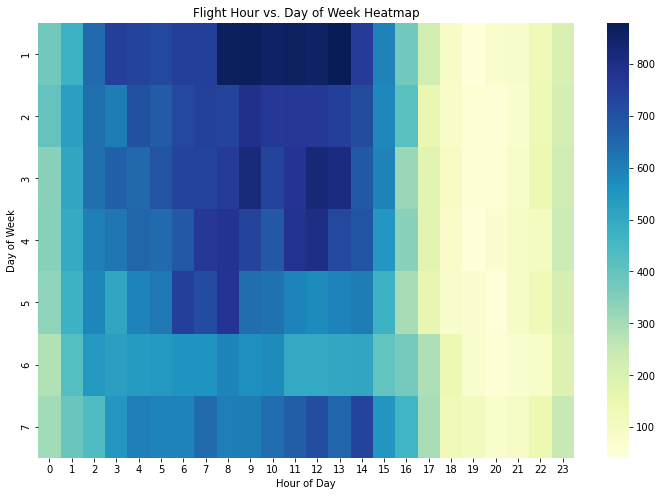

In [27]:
pivot_table = df.pivot_table(index='flight_day', columns='flight_hour', values='num_passengers', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Flight Hour vs. Day of Week Heatmap')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

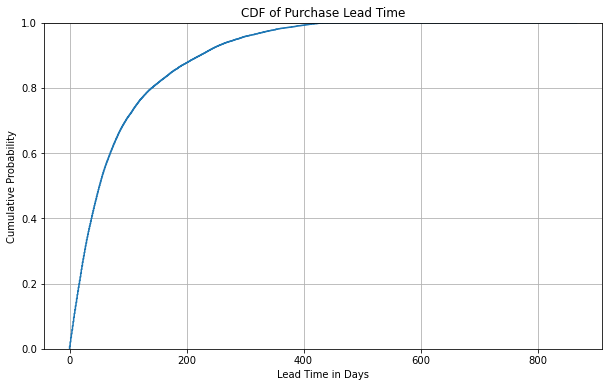

In [28]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['purchase_lead'])
plt.title('CDF of Purchase Lead Time')
plt.xlabel('Lead Time in Days')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

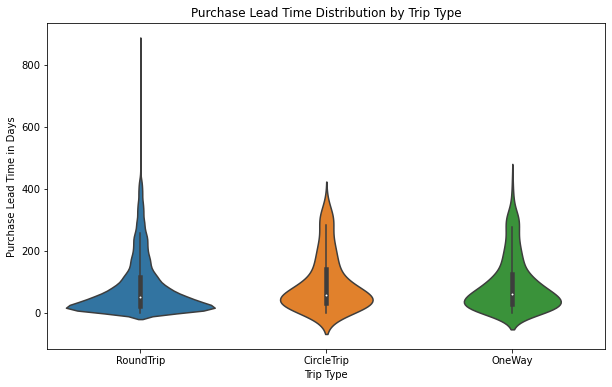

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='trip_type', y='purchase_lead', data=df)
plt.title('Purchase Lead Time Distribution by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Purchase Lead Time in Days')
plt.show()

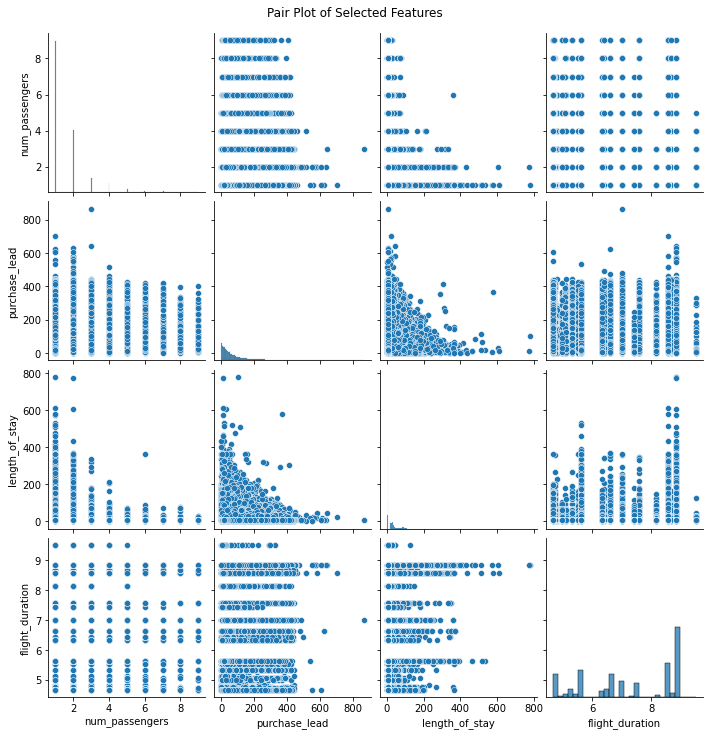

In [30]:
# Select a subset of numerical variables for clarity
subset_df = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']]

sns.pairplot(subset_df)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

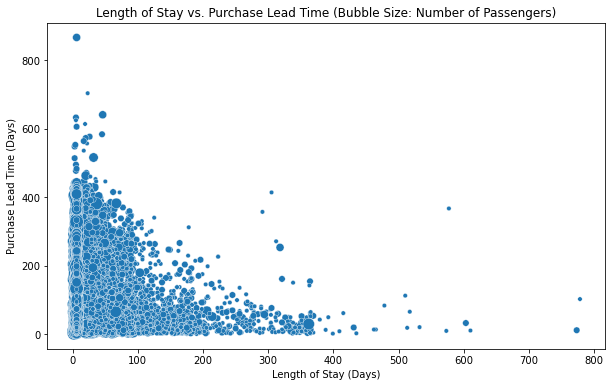

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='length_of_stay', y='purchase_lead', size='num_passengers', legend=False, sizes=(20, 200))
plt.title('Length of Stay vs. Purchase Lead Time (Bubble Size: Number of Passengers)')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Purchase Lead Time (Days)')
plt.show()

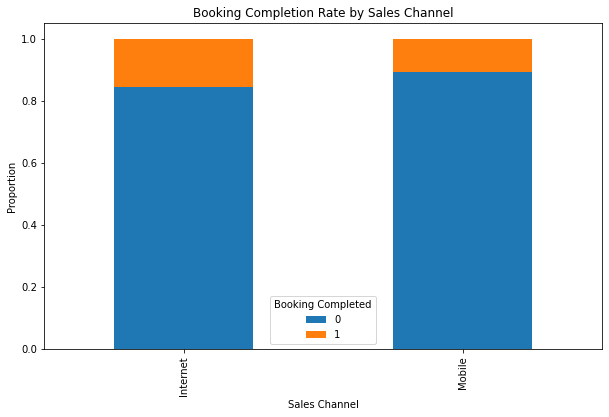

In [32]:
# Prepare data for a stacked bar chart
stacked_data = df.groupby('sales_channel')['booking_complete'].value_counts(normalize=True).unstack()

stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Booking Completion Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Proportion')
plt.legend(title='Booking Completed')
plt.show()

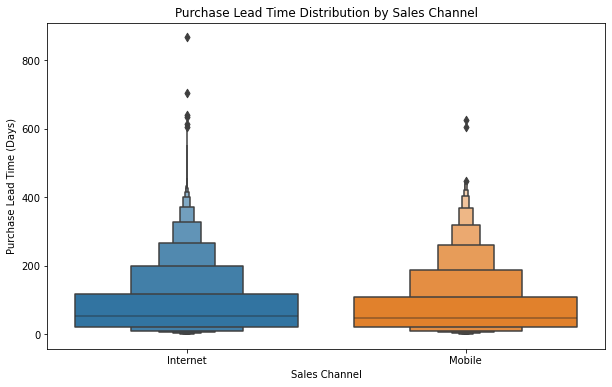

In [33]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='sales_channel', y='purchase_lead', data=df)
plt.title('Purchase Lead Time Distribution by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Purchase Lead Time (Days)')
plt.show()

In [34]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [35]:
df_dtypes = df.dtypes

In [36]:
print(df_dtypes)

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


### Four Categorical Columns are:
    
    1. Sales Channel
    2. Trip Type
    3. Booking Origin
    4. Route

In [37]:
print("Unique Values in Sales Channel are",df["sales_channel"].unique())
print("Unique Values in Trip Type are",df["trip_type"].unique())
print("Unique Values in Route are",df["route"].unique())
print("Unique Values in Booking Origin are",df["booking_origin"].unique())

Unique Values in Sales Channel are ['Internet' 'Mobile']
Unique Values in Trip Type are ['RoundTrip' 'CircleTrip' 'OneWay']
Unique Values in Route are ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 

### There are lot of Values in "Route" & "Booking Origin" Columns, if we try to encode them ---> we will end up getting more than 500+ columns, ultimately leading to Curse of Dimensionality

### Let's drop these 2 columns, and encode rest two columns

In [38]:
from sklearn.preprocessing import OneHotEncoder

#creating an instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [39]:
#fit and transform on desired categorical columns
encoded_data = encoder.fit_transform(df[["sales_channel","trip_type"]])

In [40]:
encoded_data

<50000x5 sparse matrix of type '<class 'numpy.float64'>'
	with 100000 stored elements in Compressed Sparse Row format>

In [41]:
encoded = pd.get_dummies(df,columns=['sales_channel','trip_type'])

In [42]:
encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1


In [43]:
final_df = encoded.drop(['route','booking_origin'],axis=1)

In [44]:
final_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,1,0,0,0,1
49996,1,111,6,4,7,0,0,0,5.62,0,1,0,0,0,1
49997,1,24,6,22,6,0,0,1,5.62,0,1,0,0,0,1
49998,1,15,6,11,1,1,0,1,5.62,0,1,0,0,0,1


In [45]:
label = df["booking_complete"]

In [46]:
label.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [47]:
final_df = final_df.drop(['booking_complete'],axis=1)

In [48]:
final_df.shape

(50000, 14)

### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [50]:
scaled_df = scaler.fit_transform(final_df)

In [51]:
scaled_df = pd.DataFrame(scaled_df,columns=final_df.columns)

In [52]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808


In [53]:
#Lets add the label values back

scaled_df["Label"] = label

In [54]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,Label
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


### Co-relation / HeatMap

#### Now that we are done with Encoding & Feature Scaling, lets plot Co-relation among Features

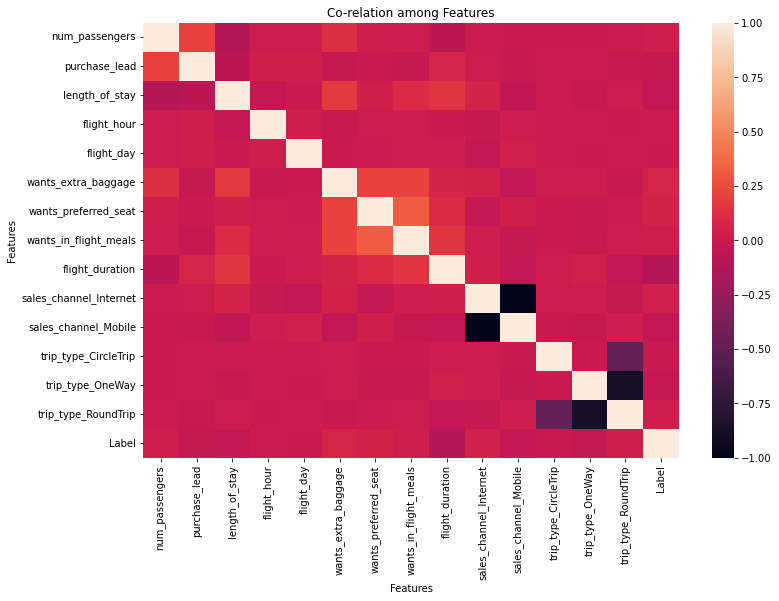

In [55]:
correlation = scaled_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Co-relation among Features")
plt.show()

### Train - Test Split

In [56]:
X = scaled_df.drop(["Label"],axis=1)
y = scaled_df["Label"]

In [57]:
print(X.shape)
print(y.shape)

(50000, 14)
(50000,)


In [58]:
y.value_counts()

0    42522
1     7478
Name: Label, dtype: int64

### Our data is Imbalanced, Utilizing SMOTE for Oversampling

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
#pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(f"Original class distribution: {y_train.value_counts()}")
print(f"SMOTE class distribution: {pd.Series(y_train_smote).value_counts()}")


Original class distribution: 0    34002
1     5998
Name: Label, dtype: int64
SMOTE class distribution: 0    34002
1    34002
Name: Label, dtype: int64


In [62]:
y_train_smote.value_counts()

0    34002
1    34002
Name: Label, dtype: int64

In [63]:
y_train.value_counts()

0    34002
1     5998
Name: Label, dtype: int64

### Modelling

#### Cool...now we've balanced both the classes in training data 😎

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


## 1. Logistic Regression

In [66]:
lr = LogisticRegression()

model1 = lr.fit(X_train_smote,y_train_smote)

In [67]:
y_pred1 = model1.predict(X_test)

In [68]:
y_pred1.shape

(10000,)

In [69]:
print("Accuracy Score for Logistic Regression is ",accuracy_score(y_test,y_pred1))
print("Precision Score for Logistic Regression is ",precision_score(y_test,y_pred1))
print("Recall Score for Logistic Regression is ",recall_score(y_test,y_pred1))
print("F1-Score  for Logistic Regression is ",f1_score(y_test,y_pred1))

Accuracy Score for Logistic Regression is  0.5851
Precision Score for Logistic Regression is  0.20663882171905915
Recall Score for Logistic Regression is  0.6351351351351351
F1-Score  for Logistic Regression is  0.31182617349477526


In [70]:
print(confusion_matrix(y_test,y_pred1))

[[4911 3609]
 [ 540  940]]


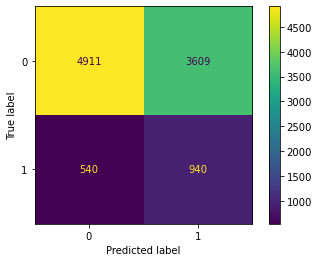

In [71]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

## 2. Random Forest Classifier

In [72]:
rf = RandomForestClassifier(n_estimators=100)

model2 = rf.fit(X_train_smote,y_train_smote)

y_pred2 = model2.predict(X_test)

In [73]:
print("Accuracy Score for Random Forest Classifier is ",accuracy_score(y_test,y_pred2))
print("Precision Score for Random Forest Classifier is ",precision_score(y_test,y_pred2))
print("Recall Score for Random Forest Classifier is ",recall_score(y_test,y_pred2))
print("F1-Score  for Random Forest Classifier is ",f1_score(y_test,y_pred2))

Accuracy Score for Random Forest Classifier is  0.8263
Precision Score for Random Forest Classifier is  0.3134978229317852
Recall Score for Random Forest Classifier is  0.14594594594594595
F1-Score  for Random Forest Classifier is  0.19917012448132781


In [74]:
print(confusion_matrix(y_test,y_pred2))

[[8047  473]
 [1264  216]]


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8520
           1       0.31      0.15      0.20      1480

    accuracy                           0.83     10000
   macro avg       0.59      0.55      0.55     10000
weighted avg       0.78      0.83      0.80     10000



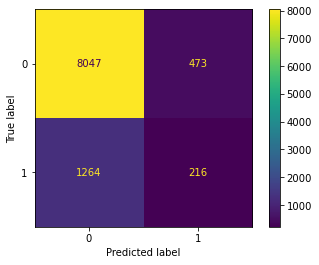

In [76]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

## 3. Gradient Boosting Classifier

In [77]:
gb = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)

model3 = gb.fit(X_train_smote,y_train_smote)

In [78]:
y_pred3 = model3.predict(X_test)

In [79]:
print("Accuracy Score for Gradient Boosting Classifier is ",accuracy_score(y_test,y_pred2))
print("Precision Score for Gradient Boosting Classifier is ",precision_score(y_test,y_pred2))
print("Recall Score for Gradient Boosting Classifier is ",recall_score(y_test,y_pred2))
print("F1-Score  for Gradient Boosting Classifier is ",f1_score(y_test,y_pred2))

Accuracy Score for Gradient Boosting Classifier is  0.8263
Precision Score for Gradient Boosting Classifier is  0.3134978229317852
Recall Score for Gradient Boosting Classifier is  0.14594594594594595
F1-Score  for Gradient Boosting Classifier is  0.19917012448132781


In [80]:
print(confusion_matrix(y_test,y_pred3))

[[8058  462]
 [1244  236]]


In [81]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      8520
           1       0.34      0.16      0.22      1480

    accuracy                           0.83     10000
   macro avg       0.60      0.55      0.56     10000
weighted avg       0.79      0.83      0.80     10000



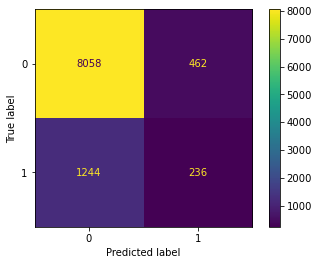

In [82]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))

## 4. XGBOOST Classifier

In [83]:
from xgboost import XGBClassifier

In [84]:
xgb = XGBClassifier()

model4 = xgb.fit(X_train_smote,y_train_smote)

In [85]:
ypred4 = model4.predict(X_test)

In [86]:
print("Accuracy Score for XGBoost Classifier is ",accuracy_score(y_test,ypred4))
print("Precision Score for XGBoost  Classifier is ",precision_score(y_test,ypred4))
print("Recall Score for XGBoost  Classifier is ",recall_score(y_test,ypred4))
print("F1-Score  for XGBoost Classifier is ",f1_score(y_test,ypred4))

Accuracy Score for XGBoost Classifier is  0.8463
Precision Score for XGBoost  Classifier is  0.3698630136986301
Recall Score for XGBoost  Classifier is  0.05472972972972973
F1-Score  for XGBoost Classifier is  0.09535020600353149


In [87]:
print(confusion_matrix(y_test,ypred4))

[[8382  138]
 [1399   81]]


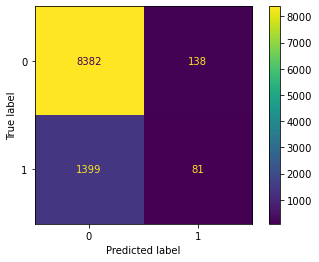

In [88]:
print(ConfusionMatrixDisplay.from_predictions(y_test,ypred4))

In [89]:
print(classification_report(y_test,ypred4))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.37      0.05      0.10      1480

    accuracy                           0.85     10000
   macro avg       0.61      0.52      0.51     10000
weighted avg       0.78      0.85      0.79     10000



## 5. LightGBM

In [90]:
import lightgbm as lg

In [91]:
lgb = lg.LGBMClassifier()

model5 = lgb.fit(X_train_smote,y_train_smote)

In [92]:
y_pred5 = model5.predict(X_test)

In [93]:
print("Accuracy Score for LGBM Classifier is ",accuracy_score(y_test,y_pred5))
print("Precision Score for LGBM  Classifier is ",precision_score(y_test,y_pred5))
print("Recall Score for LGBM  Classifier is ",recall_score(y_test,y_pred5))
print("F1-Score  for LGBM Classifier is ",f1_score(y_test,y_pred5))

Accuracy Score for LGBM Classifier is  0.8476
Precision Score for LGBM  Classifier is  0.35135135135135137
Recall Score for LGBM  Classifier is  0.03513513513513514
F1-Score  for LGBM Classifier is  0.06388206388206388


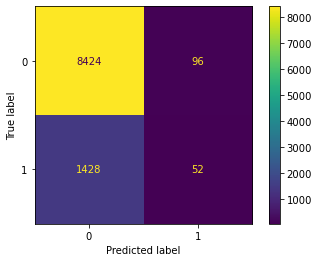

In [94]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))

In [95]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.35      0.04      0.06      1480

    accuracy                           0.85     10000
   macro avg       0.60      0.51      0.49     10000
weighted avg       0.78      0.85      0.79     10000



### Feature Importance

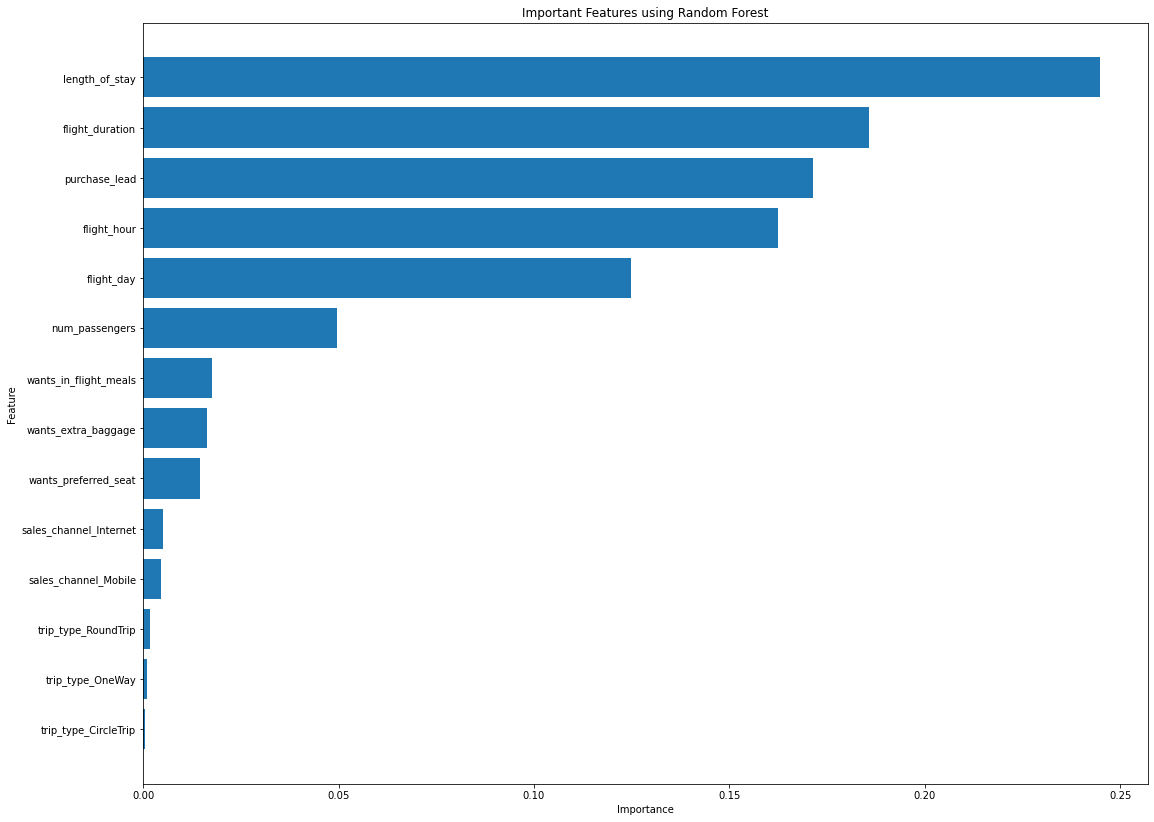

In [96]:
importances = model2.feature_importances_

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)

#plotting important features
plt.figure(figsize=(18,14))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.title("Important Features using Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()